In [1]:
# Jeff's data Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Data files
library_covid_data = "../Data/Merged_Library_Covid.csv"

# Read the mouse data and the study results
chi_library_covid = pd.read_csv(library_covid_data, dtype={'JANUARY': float, 'YTD': float, 'YEAR': object})

# Display the data table for preview
chi_library_covid.head()

,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
0,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,9664.0,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Circulation,2019,-87.701816,41.971155
1,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,354.0,229.0,234.0,377.0,369.0,500.0,4014.0,Circulation,2019,-87.633087,41.650765
2,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,5356.0,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Circulation,2019,-87.711251,41.810038
3,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,1134.0,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Circulation,2019,-87.756863,41.881113
4,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,11634.0,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Circulation,2019,-87.797373,41.944967


In [2]:
chi_library_covid.dtypes

ADDRESS       object
CITY          object
ZIP           object
JANUARY      float64
FEBRUARY     float64
MARCH        float64
APRIL        float64
MAY          float64
JUNE         float64
JULY         float64
AUGUST       float64
SEPTEMBER    float64
OCTOBER      float64
NOVEMBER     float64
DECEMBER     float64
YTD          float64
TYPE          object
YEAR          object
LAT          float64
LNG          float64
dtype: object

In [3]:
chi_library_covid_2019 = chi_library_covid.loc[chi_library_covid['YEAR'] == "2019"]
chi_library_covid_2020 = chi_library_covid.loc[chi_library_covid['YEAR'] == "2020"]
chi_library_covid_2021 = chi_library_covid.loc[chi_library_covid['YEAR'] == "2021"]

In [4]:
# len(chi_library_covid_2019)
# len(chi_library_covid_2020)
# len(chi_library_covid_2021)

In [5]:
chi_library_covid_2019.head()

,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
0,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,9664.0,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Circulation,2019,-87.701816,41.971155
1,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,354.0,229.0,234.0,377.0,369.0,500.0,4014.0,Circulation,2019,-87.633087,41.650765
2,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,5356.0,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Circulation,2019,-87.711251,41.810038
3,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,1134.0,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Circulation,2019,-87.756863,41.881113
4,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,11634.0,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Circulation,2019,-87.797373,41.944967


In [6]:
# summary_stats_2019 = chi_library_covid_2019
# agg_func_math = {
#     'YTD':
#     ['mean', 'median', 'var', 'std', 'sem']
# }
# summary_stats_2019.groupby(['TYPE']).agg(agg_func_math).round(2)

In [7]:
# https://jamesrledoux.com/code/group-by-aggregate-pandas
summary_stats_2019_ytd = chi_library_covid_2019.groupby(['TYPE']).agg({'YTD': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_ytd.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_ytd = summary_stats_2019_ytd.reset_index()
summary_stats_2019_ytd

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,59075.41,39280.0,6.292804e+09,79327.2,8814.13
1,Visitors,59075.41,39280.0,6.292804e+09,79327.2,8814.13


In [8]:
summary_stats_2019_january = chi_library_covid_2019.groupby(['TYPE']).agg({'JANUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_january.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_january = summary_stats_2019_january.reset_index()
summary_stats_2019_january

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4712.41,2715.0,43541702.02,6598.61,733.18
1,Visitors,4712.41,2715.0,43541702.02,6598.61,733.18


In [9]:
summary_stats_2019_february = chi_library_covid_2019.groupby(['TYPE']).agg({'FEBRUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_february.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_february = summary_stats_2019_february.reset_index()
summary_stats_2019_february

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4597.1,3106.0,39325794.67,6271.03,696.78
1,Visitors,4597.1,3106.0,39325794.67,6271.03,696.78


In [10]:
summary_stats_2019_march = chi_library_covid_2019.groupby(['TYPE']).agg({'MARCH': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_march.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_march = summary_stats_2019_march.reset_index()
summary_stats_2019_march

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5265.59,3354.0,51822906.27,7198.81,799.87
1,Visitors,5265.59,3354.0,51822906.27,7198.81,799.87


In [11]:
summary_stats_2019_april = chi_library_covid_2019.groupby(['TYPE']).agg({'APRIL': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_april.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_april = summary_stats_2019_april.reset_index()
summary_stats_2019_april

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4959.98,3152.0,45284240.35,6729.36,747.71
1,Visitors,4959.98,3152.0,45284240.35,6729.36,747.71


In [12]:
summary_stats_2019_may = chi_library_covid_2019.groupby(['TYPE']).agg({'MAY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_may.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_may = summary_stats_2019_may.reset_index()
summary_stats_2019_may

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4728.74,2942.0,42558934.07,6523.72,724.86
1,Visitors,4728.74,2942.0,42558934.07,6523.72,724.86


In [13]:
summary_stats_2019_june = chi_library_covid_2019.groupby(['TYPE']).agg({'JUNE': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_june.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_june = summary_stats_2019_june.reset_index()
summary_stats_2019_june

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5054.4,3189.0,45447420.04,6741.47,749.05
1,Visitors,5054.4,3189.0,45447420.04,6741.47,749.05


In [14]:
summary_stats_2019_july = chi_library_covid_2019.groupby(['TYPE']).agg({'JULY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_july.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_july = summary_stats_2019_july.reset_index()
summary_stats_2019_july

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5666.57,3633.0,52951170.75,7276.76,808.53
1,Visitors,5666.57,3633.0,52951170.75,7276.76,808.53


In [15]:
summary_stats_2019_august = chi_library_covid_2019.groupby(['TYPE']).agg({'AUGUST': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_august.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_august = summary_stats_2019_august.reset_index()
summary_stats_2019_august

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5537.2,3547.0,52854589.61,7270.12,807.79
1,Visitors,5537.2,3547.0,52854589.61,7270.12,807.79


In [16]:
summary_stats_2019_september = chi_library_covid_2019.groupby(['TYPE']).agg({'SEPTEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_september.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_september = summary_stats_2019_september.reset_index()
summary_stats_2019_september

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4789.09,3385.0,42164699.5,6493.44,721.49
1,Visitors,4789.09,3385.0,42164699.5,6493.44,721.49


In [17]:
summary_stats_2019_october = chi_library_covid_2019.groupby(['TYPE']).agg({'OCTOBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_october.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_october = summary_stats_2019_october.reset_index()
summary_stats_2019_october

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5137.59,3790.0,47646712.07,6902.66,766.96
1,Visitors,5137.59,3790.0,47646712.07,6902.66,766.96


In [18]:
summary_stats_2019_november = chi_library_covid_2019.groupby(['TYPE']).agg({'NOVEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_november.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_november = summary_stats_2019_november.reset_index()
summary_stats_2019_november

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4545.59,3223.0,38023537.32,6166.32,685.15
1,Visitors,4545.59,3223.0,38023537.32,6166.32,685.15


In [19]:
summary_stats_2019_december = chi_library_covid_2019.groupby(['TYPE']).agg({'DECEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_december.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_december = summary_stats_2019_december.reset_index()
summary_stats_2019_december

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4081.16,2654.0,32762299.39,5723.84,635.98
1,Visitors,4081.16,2654.0,32762299.39,5723.84,635.98


In [21]:
zip_2019_visitors = chi_library_covid_2019.loc[chi_library_covid_2019['TYPE'] == "Visitors"]
total_visitors_2019 = zip_2019_visitors['YTD'].sum()
total_visitors_2019

4785108.0

In [36]:
visitor_analysis_2019 = zip_2019_visitors.groupby(['ZIP']).sum()
visitor_analysis_2019.head()

,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,LAT,LNG
ZIP,,,,,,,,,,,,,,,
60605,48072.0,46112.0,52568.0,49554.0,48041.0,47580.0,51624.0,52012.0,48078.0,50636.0,44604.0,42270.0,581151.0,-87.623449,41.867824
60607,3708.0,9361.0,11862.0,10323.0,10547.0,11056.0,12470.0,12474.0,10107.0,11091.0,9809.0,8878.0,121686.0,-175.305454,83.752208
60608,9061.0,7843.0,9704.0,8745.0,8292.0,8329.0,9678.0,9577.0,8212.0,9127.0,8289.0,6943.0,103800.0,-175.340732,83.699758
60609,9701.0,9515.0,10403.0,10706.0,9435.0,9620.0,11103.0,11095.0,9919.0,11244.0,9121.0,8525.0,120387.0,-438.266910,209.060085
60610,8232.0,7589.0,8325.0,8367.0,8600.0,8953.0,9921.0,9653.0,8051.0,9220.0,7965.0,7350.0,102226.0,-87.635810,41.904550


In [37]:
visitor_analysis_2019 = visitor_analysis_2019.reset_index()
visitor_analysis_2019.head()

,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,LAT,LNG
0,60605,48072.0,46112.0,52568.0,49554.0,48041.0,47580.0,51624.0,52012.0,48078.0,50636.0,44604.0,42270.0,581151.0,-87.623449,41.867824
1,60607,3708.0,9361.0,11862.0,10323.0,10547.0,11056.0,12470.0,12474.0,10107.0,11091.0,9809.0,8878.0,121686.0,-175.305454,83.752208
2,60608,9061.0,7843.0,9704.0,8745.0,8292.0,8329.0,9678.0,9577.0,8212.0,9127.0,8289.0,6943.0,103800.0,-175.340732,83.699758
3,60609,9701.0,9515.0,10403.0,10706.0,9435.0,9620.0,11103.0,11095.0,9919.0,11244.0,9121.0,8525.0,120387.0,-438.266910,209.060085
4,60610,8232.0,7589.0,8325.0,8367.0,8600.0,8953.0,9921.0,9653.0,8051.0,9220.0,7965.0,7350.0,102226.0,-87.635810,41.904550


In [45]:
percent_visitors_zip_2019 = (visitor_analysis_2019["YTD"] / total_visitors_2019) * 100
percent_visitors_zip_2019.head()

0    12.144992
1     2.543015
2     2.169230
3     2.515868
4     2.136336
Name: YTD, dtype: float64

In [47]:
final_percent_visitors_by_zip_2019 = pd.DataFrame({"Percent of Visitors 2019": percent_visitors_by_zip_2019})
final_percent_visitors_by_zip_2019.head()

,Percent of Visitors 2019
0,12.144992
1,2.543015
2,2.169230
3,2.515868
4,2.136336


In [39]:
summary_stats_2020 = chi_library_covid_2020.groupby(['TYPE']).agg({'YTD': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020 = summary_stats_2020.reset_index()
summary_stats_2020

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,33656.25,19047.0,1.895243e+09,43534.39,4837.15
1,Visitors,41459.75,30545.0,4.020040e+09,63403.79,7088.76


In [40]:
summary_stats_2021 = chi_library_covid_2021.groupby(['TYPE']).agg({'YTD': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021 = summary_stats_2021.reset_index()
summary_stats_2021

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,4095.62,3856.5,5.092609e+06,2256.68,291.34
1,Circulation,39312.68,23328.0,2.366440e+09,48646.07,5405.12
2,Deaths,36.72,35.0,8.046800e+02,28.37,3.66
3,Tests,97285.42,101070.0,2.848010e+09,53366.75,6889.62
4,Visitors,44132.74,33031.0,3.988815e+09,63157.07,7017.45


In [48]:
chi_library_covid.head()

,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
0,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,9664.0,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Circulation,2019,-87.701816,41.971155
1,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,354.0,229.0,234.0,377.0,369.0,500.0,4014.0,Circulation,2019,-87.633087,41.650765
2,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,5356.0,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Circulation,2019,-87.711251,41.810038
3,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,1134.0,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Circulation,2019,-87.756863,41.881113
4,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,11634.0,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Circulation,2019,-87.797373,41.944967


In [50]:
just_visitors = chi_library_covid.loc[chi_library_covid['TYPE'] == "Visitors"]
just_visitors

,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
81,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,9664.0,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Visitors,2019,-87.701816,41.971155
82,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,354.0,229.0,234.0,377.0,369.0,500.0,4014.0,Visitors,2019,-87.633087,41.650765
83,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,5356.0,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Visitors,2019,-87.711251,41.810038
84,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,1134.0,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Visitors,2019,-87.756863,41.881113
85,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,11634.0,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Visitors,2019,-87.797373,41.944967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,9525 S. Halsted St.,Chicago,60628,3655.0,3446.0,5049.0,6815.0,3638.0,3144.0,5060.0,5636.0,5256.0,5312.0,4550.0,4426.0,55987.0,Visitors,2021,-87.621537,41.694192
481,7506 S. Racine Ave.,Chicago,60620,2094.0,2043.0,2695.0,2698.0,2419.0,2557.0,2944.0,3165.0,2994.0,3092.0,2690.0,2773.0,32164.0,Visitors,2021,-87.651656,41.740873
482,3647 S. State St.,Chicago,60609,496.0,488.0,595.0,653.0,866.0,974.0,898.0,1130.0,1076.0,1145.0,931.0,936.0,10188.0,Visitors,2021,-87.653382,41.812017
483,3710 E. 106th St.,Chicago,60617,2007.0,2769.0,2370.0,2357.0,2184.0,2188.0,3058.0,3058.0,3141.0,3674.0,3405.0,3357.0,33568.0,Visitors,2021,-87.556897,41.721257


In [51]:
visitors_for_zip = just_visitors[["ZIP", "YTD"]]
visitors_for_zip

,ZIP,YTD
81,60625,93009.0
82,60827,4014.0
83,60632,58025.0
84,60644,11328.0
85,60634,119100.0
...,...,...
480,60628,55987.0
481,60620,32164.0
482,60609,10188.0
483,60617,33568.0


In [57]:
visitors_by_zip = visitors_for_zip['ZIP']
visitors_by_zip_YTD = visitors_for_zip['YTD']
x_axis = np.arange(len(visitors_by_zip_YTD))

Text(0, 0.5, 'Number of Visitors')

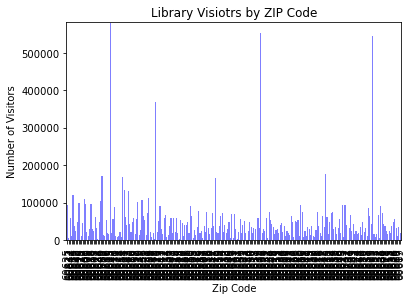

In [60]:

plt.bar(x_axis, visitors_by_zip_YTD, color="b", alpha=0.5, align="center")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, visitors_by_zip, rotation=90)


# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(visitors_by_zip_YTD)+50)

# Give chart some labels and a tile
plt.title("Library Visiotrs by ZIP Code")
plt.xlabel("Zip Code")
plt.ylabel("Number of Visitors")